In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

# Machine Learning Engineer Nanodegree

### Reinforcement Learning

## Project 4: Train a Smartcab to Drive

### Question 1

Run this agent within the simulation environment with enforce_deadline set to False (see run function in agent.py), and observe how it performs. In this mode, the agent is given unlimited time to reach the destination. The current state, action taken by your agent and reward/penalty earned are shown in the simulator.

In your report, mention what you see in the agent’s behavior. Does it eventually make it to the target location?

**Answer:**

As the agent has unlimited time to reach the destination, it eventually does. The time it takes to reach the destination depends on how lucky the agent is. Below you can see the number of updates required to reach the goal state for 10 trials:

1. 55 updates
2. 24 updates
3. 363 updates
4. 149 updates
5. 16 update
6. 75 updates
7. 98 updates
8. 115 updates
9. 20 updates
10. 15 updates

### Question 2

Identify a set of states that you think are appropriate for modeling the driving agent. The main source of state variables are current inputs, but not all of them may be worth representing. Also, you can choose to explicitly define states, or use some combination (vector) of inputs as an implicit state.

Justify why you picked these set of states, and how they model the agent and its environment.

**Answer:**

Based on the traffic rules it makes sense to keep track of the state of the traffic light, oncoming traffic as the agent should be aware of these to avoid making traffic violates and crash into oncoming traffic. On a red light the agent can turn right as long as there is no oncoming traffic turning left or traffic from the left going straight, we should therefore also inform the agent about traffic from the left. Due to the circulation rules information about traffic coming from the right can safely be ignored. We would factor in the time, however this could cause the smartcab to take some extra risk and learn some unwanted behavior such as traffic rule infringements in order to make it to the target on time. It would also be beneficial to inform the agent about which direction the planner want it to go.

The state s is represented using **traffic light**, **oncoming**, **left**, **next waypoint**.

### Question 3

Implement the Q-Learning algorithm by initializing and updating a table/mapping of Q-values at each time step. Now, instead of randomly selecting an action, pick the best action available from the current state based on Q-values, and return that.

What changes do you notice in the agent’s behavior?

**Answer:**

The code for my initial Q-learning agent can be found in agent.py, the following parameter settings was used to generate the results:

* $\gamma = 0.35$
* $\epsilon = 0.9$
* $\alpha = 0.2$

The Q-learning algorithm gives the agent a better understanding of the world. The agent fairly quickly learns the traffic rules to a certain degree and makes it to the target within the dealine most of the times. 

Let's run the agent 5 times using 100 trials and study the results.

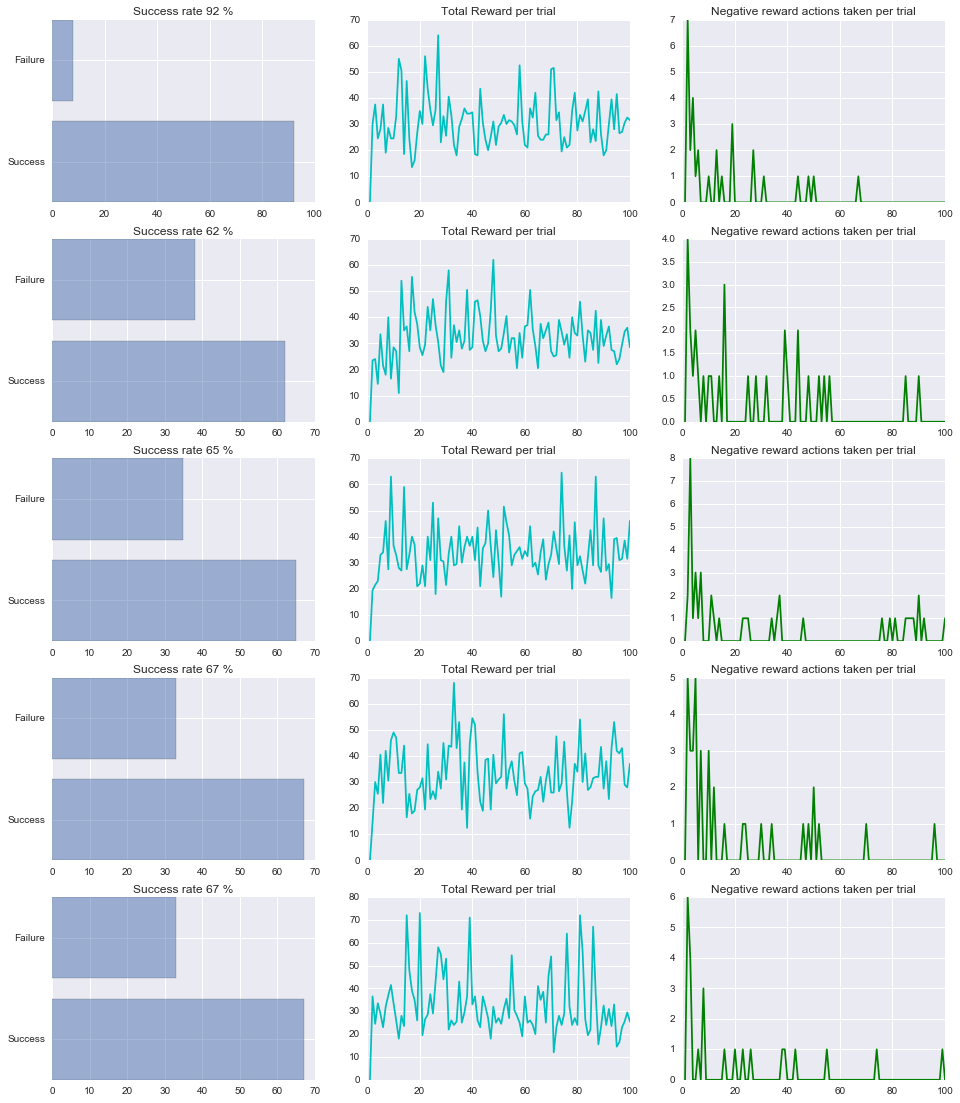

In [7]:
from agent import run

# Initialize figure size
fig = plt.figure(figsize=(16, 19))

n_rows, n_cols = 5, 3
trials = range(1, 101)

for i in range(n_rows):
    # Get some basic run information
    results, mistakes, rewards = run()
    
    # Visualize the successrate
    plt.subplot2grid((n_rows, n_cols), (i, 0))
    labels = ['Success', 'Failure']
    y_pos = np.arange(len(labels))
    res = [100-len(results), len(results)]
    plt.barh(y_pos, res, align='center', alpha=0.5)
    plt.yticks(y_pos, labels)
    plt.title("Success rate {} %".format(100 - len(results)));

    # Visualize the rewards
    plt.subplot2grid((n_rows, n_cols), (i, 1))
    plt.plot(trials, rewards, 'c')
    plt.title("Total Reward per trial")

    # Visualize the negative reward actions
    plt.subplot2grid((n_rows, n_cols), (i, 2))
    plt.plot(trials, mistakes, 'g')
    plt.title("Negative reward actions taken per trial");

### Question 4

Enhance the driving agent

Apply the reinforcement learning techniques you have learnt, and tweak the parameters (e.g. learning rate, discount factor, action selection method, etc.), to improve the performance of your agent. Your goal is to get it to a point so that within 100 trials, the agent is able to learn a feasible policy - i.e. reach the destination within the allotted time, with net reward remaining positive.

Report what changes you made to your basic implementation of Q-Learning to achieve the final version of the agent. How well does it perform?

**Answer:**

**Action Selection Method**


**Parameter Tuning**

### Question 5

Does your agent get close to finding an optimal policy, i.e. reach the destination in the minimum possible time, and not incur any penalties?

**Answer:**